# 6. Otsu Thresholding


### Master of Applied Artificial Intelligence

**Course: TC4033 - Computational Vision for Images and Video**

<img src="./../assets/logo.png" alt="Image Alt Text" width="500"/>

**Segmentation Otsu**

Tutor: Dr. Gilberto Ochoa


Team members:
* Alfonso de Lucas Espinosa - A01795118
* Ignacio Jose Aguilar Garcia - A00819762
* Alejandro Calderon Aguilar - A01795353
* Ricardo Mar Cupido - A01795394
* Mario Fonseca Martinez - A01795228

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)

Thresholding is used to create a binary image from a grayscale image

**Introduction**

Image segmentation plays a major role in various image processing tasks, such as object detection and segmentation. One of the most effective methods is Otsu’s method, which automatically determines an optimal threshold to divide an image into different regions. The method is optimal in the sense that it maximizes the between-class variance, a well-known measure used in statistical discriminant analysis. The basic idea is that properly thresholded classes should have distinct pixel intensity values. Conversely, the best threshold is the one that maximizes the separation between these classes based on intensity.

**Otsu’s thresholding algorithm**

Otsu’s method is a well-known technique used in computer vision and image processing for automatic image thresholding. The main purpose of Otsu’s method is to determine an optimal threshold value that effectively separates pixels in an image into two distinct classes: foreground and background.

The algorithm works by analyzing the histogram of the image, which represents the distribution of pixel intensities. Otsu’s method aims to find the threshold value that minimizes the variance within each class (intra-class variance) or, equivalently, maximizes the variance between classes (inter-class variance). By achieving this, it identifies the threshold that best discriminates the foreground and background regions, making it useful for image segmentation tasks.

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
from skimage import io, color
import numpy as np

## Images <a class="anchor" id="libraries" ></a>

In [ ]:
image_files = [
    "./data/chiaroscuro.jpg",
    "./data/high_contrast.jpg",
    "./data/low_contrast.jpg",
    "./data/noise.png",
    "./data/soft.jpg",
    "./data/texture.jpg",
]

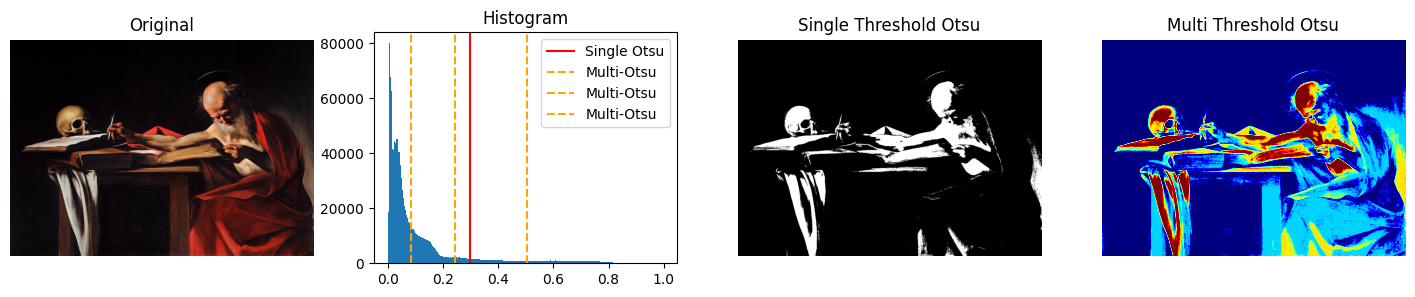

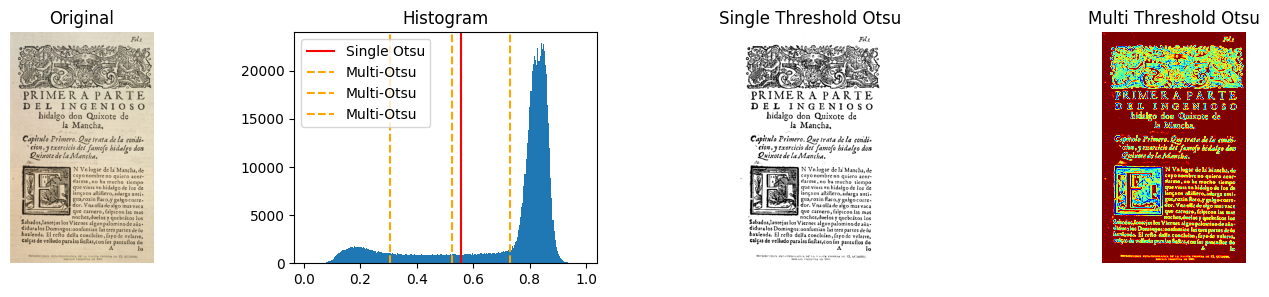

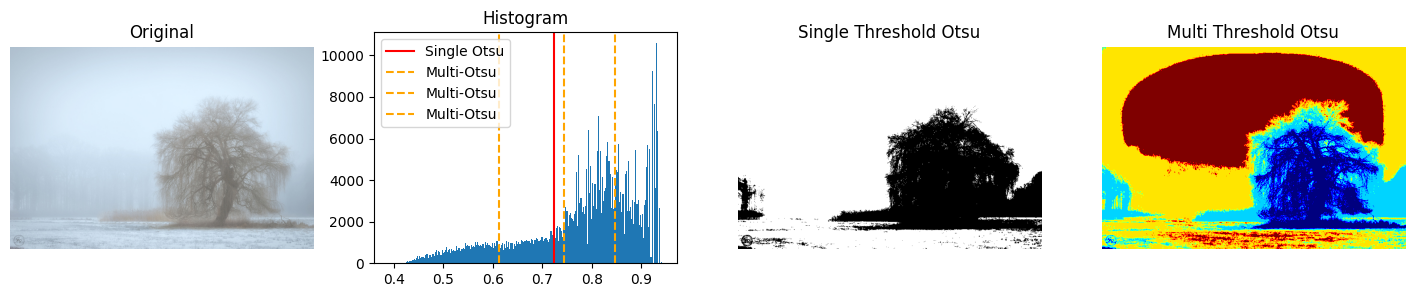

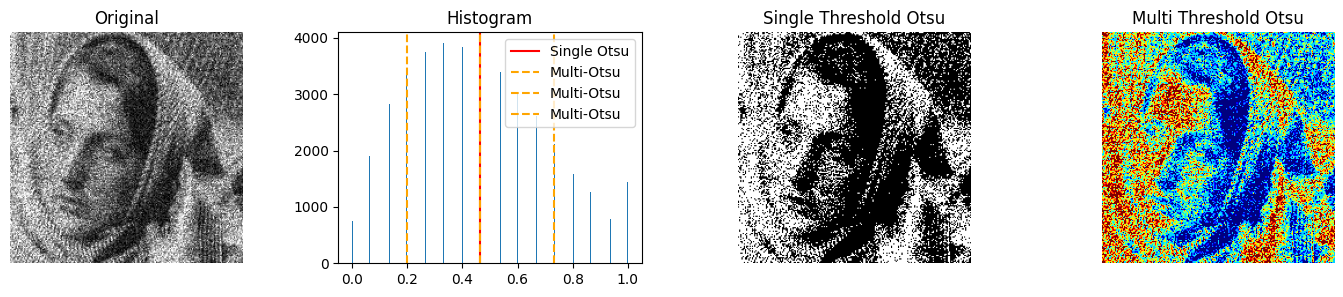

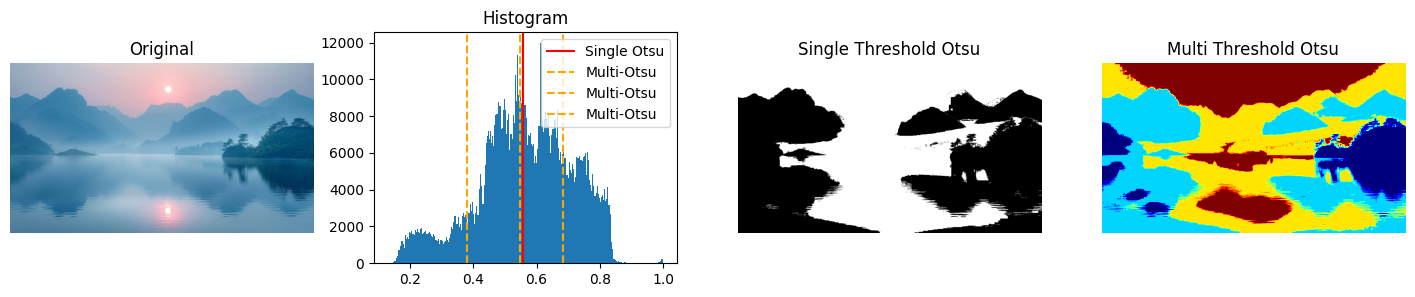

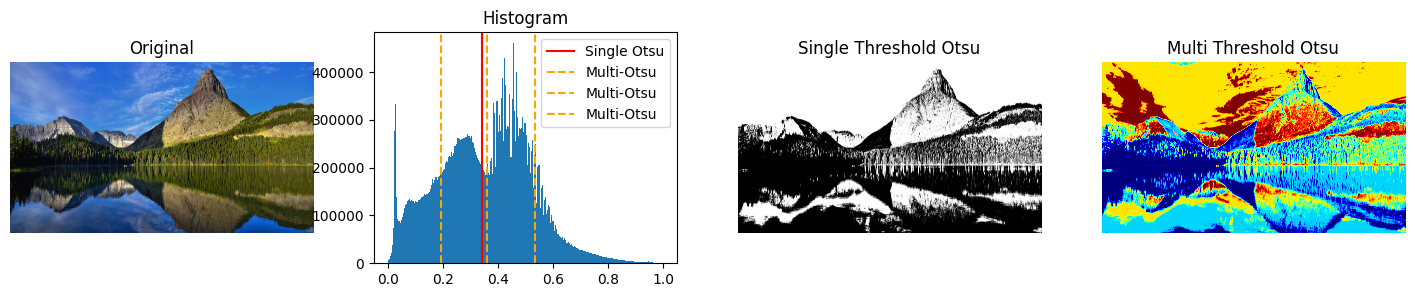

In [ ]:
def process_images(image_list):
    for img in image_list:
        # Load image
        original_img = io.imread(img)
        img = original_img
        if len(img.shape) == 3:  # Generate a grayscale version to work with
            img = color.rgb2gray(img)

        # Apply single-threshold Otsu
        thresh_otsu = threshold_otsu(img)
        binary_otsu = img > thresh_otsu

        # Apply multi-threshold Otsu
        thresh_multi = threshold_multiotsu(img, classes=4)  # 4 classes = 3 thesholds
        binary_multi = np.digitize(img, bins=thresh_multi)

        # Show results for each image
        fig, axes = plt.subplots(ncols=4, figsize=(18, 3))
        ax = axes.ravel()

        ax[0].imshow(original_img)
        ax[0].set_title('Original')
        ax[0].axis('off')

        ax[1].hist(img.ravel(), bins=256)
        ax[1].set_title('Histogram')
        ax[1].axvline(thresh_otsu, color='r', label='Single Otsu')
        for t in thresh_multi:
            ax[1].axvline(t, color='orange', linestyle='dashed', label='Multi-Otsu')
        ax[1].legend()

        ax[2].imshow(binary_otsu, cmap=plt.cm.gray)
        ax[2].set_title('Single Threshold Otsu')
        ax[2].axis('off')

        ax[3].imshow(binary_multi, cmap='jet')
        ax[3].set_title('Multi Threshold Otsu')
        ax[3].axis('off')

        plt.show()

process_images(image_files)

### 3.1 chiaroscuro

* **Single Threshold (Otsu):** The algorithm attempts to find a single cutoff intensity to separate darker shadows from lighter areas. In regions where the transition between shadow and light is very smooth, a single threshold might lead to partial misclassification or “blending” of tones.

* **Multi Threshold (Otsu):** With multiple thresholds, the image is split into several classes, capturing more nuances in the subtle transition zones. This better preserves the gradation from dark to bright areas.

### 3.2 high_contrast

* **Single Threshold (Otsu):** Often produces an excellent binarized result because the background and foreground intensities are separated by a clear margin in the histogram.

* **Multi Threshold (Otsu):** While also producing a good result, it may show large areas cleanly split into two or three classes. Additional classes may or may not offer new visual insight if the image has only two dominant intensity peaks.

### 3.3 low_contrast

* **Single Threshold (Otsu):** Many pixel values fall in a tight range, so a single threshold could yield either a mostly white or mostly black result—or an uneven segmentation.

* **Multi Threshold (Otsu):** Attempting to create multiple classes might at least separate some subtle differences in tone; however, if the image truly has very little contrast, the classes may end up being very close to each other, still resulting in limited visual separation.

### 3.4 noise

* **Single Threshold (Otsu):** Noise can mislead the histogram, causing the threshold to shift or leading to scattered misclassifications in the binary image (small black or white dots or patches).

* **Multi Threshold (Otsu):** Multiple thresholds can separate different levels of gray. Often, pre-processing (e.g., smoothing filters) is recommended before applying Otsu to reduce the effect of noise.

### 3.5 soft

* **Single Threshold (Otsu):** May result in certain regions falling either above or below the threshold in a somewhat abrupt manner, losing some subtle gradation details.

* **Multi Threshold (Otsu):** By splitting into multiple intensity classes, the smooth gradient is more faithfully captured, yielding a segmented image that reveals gentle transitions.

**References**


*   OpenCV. (n.d.). Image Thresholding. OpenCV Documentation. Retrieved from https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

*   Murzova, A., & Seth, S. (2020, August 5). Otsu’s Thresholding with OpenCV. LearnOpenCV. Retrieved from https://learnopencv.com/otsu-thresholding-with-opencv/

*   GeeksforGeeks. (n.d.). Mahotas – Otsu’s method. GeeksforGeeks. Retrieved from https://www.geeksforgeeks.org/mahotas-otsus-method/

*  Vignesh, G. (2020, November 23). Image segmentation using Otsu threshold selection method. Medium. Retrieved from https://medium.com/@vignesh.g1609/image-segmentation-using-otsu-threshold-selection-method-856ccdacf22